In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [9]:
dataset=pd.read_csv('haberman.csv')
dataset

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [14]:
df=dataset.rename(columns={'30': 'age','64': 'year_of_op','1':'aux_nodes','1.1':'survival_status'})

In [16]:
df.head()

,age,year_of_op,aux_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


## Observation

There are 3 independent variable(age, year_of_op,aux_nodes) and 1 dependent variable survival status

## Objective

Our objcetive is to classify survival status (1:survived, 2:didn't survive) using the given data

In [18]:
df['survival_status'].value_counts()

1    224
2     81
Name: survival_status, dtype: int64

####  dataset is imbalanced

## Univariate Analysis

In [20]:
df_surv=df.loc[df['survival_status']==1]
df_not_sur=df.loc[df['survival_status']==2]

In [22]:
df

,age,year_of_op,aux_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [59]:
df_not_sur


,age,year_of_op,aux_nodes,survival_status
6,34,59,0,2
7,34,66,9,2
23,38,69,21,2
33,39,66,0,2
42,41,60,23,2
...,...,...,...,...
285,70,58,4,2
292,72,63,0,2
298,74,65,3,2
303,78,65,1,2


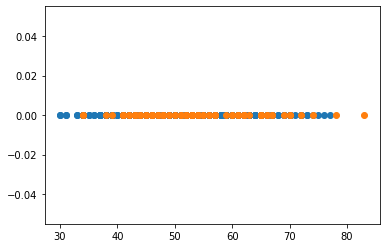

In [28]:
plt.plot(df_surv['age'],np.zeros_like(df_surv['age']),'o')
plt.plot(df_not_sur['age'],np.zeros_like(df_not_sur['age']),'o')

#### For class 'age' there are alot of datapoints that are overlapping, it's difficult to classify survival status with just 'age'

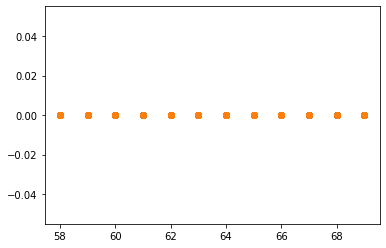

In [46]:
plt.plot(df_surv['year_of_op'],np.zeros_like(df_surv['year_of_op']),'o')
plt.plot(df_not_sur['year_of_op'],np.zeros_like(df_not_sur['year_of_op']),'o')

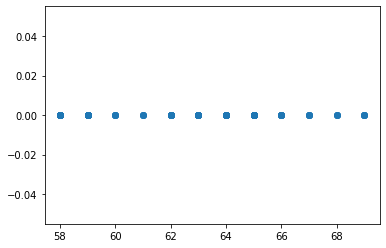

In [44]:
plt.plot(df_not_sur['year_of_op'],np.zeros_like(df_not_sur['year_of_op']),'o')

#### year of operation is terrible feature for classification

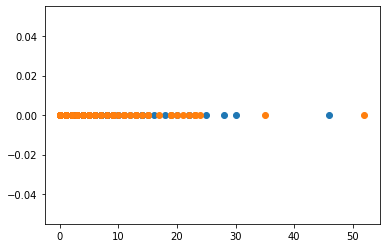

In [56]:
plt.plot(df_surv['aux_nodes'],np.zeros_like(df_surv['aux_nodes']),'o')
plt.plot(df_not_sur['aux_nodes'],np.zeros_like(df_not_sur['aux_nodes']),'o')

#### There is too much overlap for datapoints in aux_nodes feature

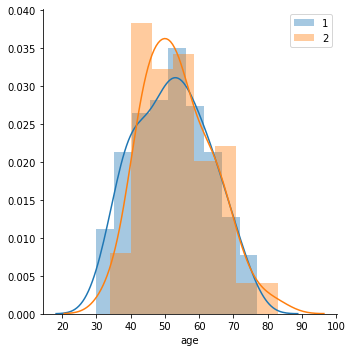

In [60]:
g = sns.FacetGrid(df, hue="survival_status",height=5)
g.map(sns.distplot,'age')
plt.legend(['1','2'])

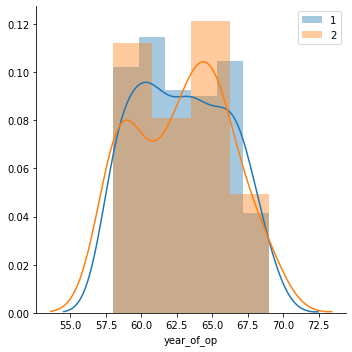

In [61]:
g = sns.FacetGrid(df, hue="survival_status",height=5)
g.map(sns.distplot,'year_of_op')
plt.legend(['1','2'])

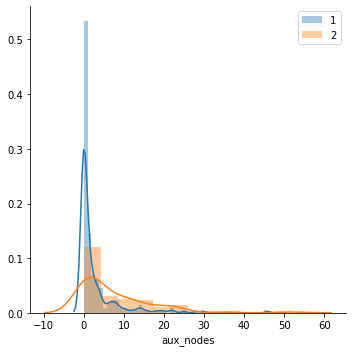

In [62]:
g = sns.FacetGrid(df, hue="survival_status",height=5)
g.map(sns.distplot,'aux_nodes')
plt.legend(['1','2'])

## PDF ad CDF for each feature

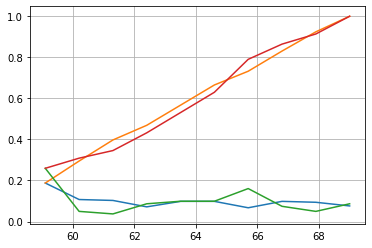

In [68]:
counts, bin_edges=np.histogram(df_surv['year_of_op'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)



counts, bin_edges=np.histogram(df_not_sur['year_of_op'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.grid()

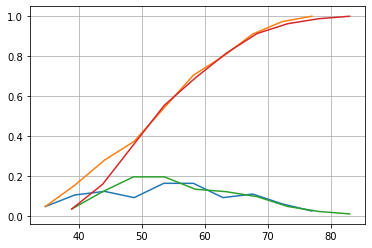

In [69]:
counts, bin_edges=np.histogram(df_surv['age'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)



counts, bin_edges=np.histogram(df_not_sur['age'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.grid()

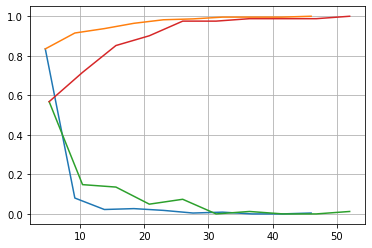

In [71]:
counts, bin_edges=np.histogram(df_surv['aux_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges=np.histogram(df_not_sur['aux_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.grid()

## Mean, Variance and Std Dev

In [75]:

print('mean age for people who did survive--->',np.mean(df_surv['age']))
print('mean age for people who didn\'t survive--->',np.mean(df_not_sur['age']))

mean age for people who did survive---> 52.11607142857143
mean age for people who didn't survive---> 53.67901234567901


In [76]:

print('mean year of operation for people who did survive--->',np.mean(df_surv['year_of_op']))
print('mean year of operation for people who didn\'t survive--->',np.mean(df_not_sur['year_of_op']))

mean year of operation for people who did survive---> 62.857142857142854
mean year of operation for people who didn't survive---> 62.82716049382716


In [77]:

print('mean number of aux nodes for people who did survive--->',np.mean(df_surv['aux_nodes']))
print('mean number of aux nodes for people who didn\'t survive--->',np.mean(df_not_sur['aux_nodes']))

mean number of aux nodes for people who did survive---> 2.799107142857143
mean number of aux nodes for people who didn't survive---> 7.45679012345679


In [78]:
print('standard dev in distribution of age for people who did survive--->',np.std(df_surv['age']))
print('standard dev in distribution of age for people who didn\'t survive--->',np.std(df_not_sur['age']))

standard dev in distribution of age for people who did survive---> 10.913004640364278
standard dev in distribution of age for people who didn't survive---> 10.104182193031312


In [79]:
print('standard dev in distribution of year of operation for people who did survive--->',np.std(df_surv['year_of_op']))
print('standard dev in distribution of year of operation for people who didn\'t survive--->',np.std(df_not_sur['year_of_op']))

standard dev in distribution of year of operation for people who did survive---> 3.222014517506153
standard dev in distribution of year of operation for people who didn't survive---> 3.3214236255207887


In [80]:
print('standard dev in distribution of aux nodes for people who did survive--->',np.std(df_surv['aux_nodes']))
print('standard dev in distribution of aux nodes for people who didn\'t survive--->',np.std(df_not_sur['aux_nodes']))

standard dev in distribution of aux nodes for people who did survive---> 5.869092706952764
standard dev in distribution of aux nodes for people who didn't survive---> 9.128776076761635


In [91]:
print('percentile of age             : [0   25  50  75]')
print('people who did survie         :',np.percentile(df_surv['age'],[0,25,50,75]))
print('people who didn\'t survive     :',np.percentile(df_not_sur['age'],[0,25,50,75]))


percentile of age             : [0   25  50  75]
people who did survie         : [30. 43. 52. 60.]
people who didn't survive     : [34. 46. 53. 61.]


In [93]:
print('percentile of year of operation : [0   25  50  75]')
print('people who did survie           :',np.percentile(df_surv['year_of_op'],[0,25,50,75]))
print('people who didn\'t survive       :',np.percentile(df_not_sur['year_of_op'],[0,25,50,75]))

percentile of year of operation : [0   25  50  75]
people who did survie           : [58. 60. 63. 66.]
people who didn't survive       : [58. 59. 63. 65.]


In [97]:
print('percentile of aux nodes       : [0   25  50  75  100]')
print('people who did survie         :',np.percentile(df_surv['aux_nodes'],[0,25,50,75,100]))
print('people who didn\'t survive     :',np.percentile(df_not_sur['aux_nodes'],[0,25,50,75,100]))

percentile of aux nodes       : [0   25  50  75  100]
people who did survie         : [ 0.  0.  0.  3. 46.]
people who didn't survive     : [ 0.  1.  4. 11. 52.]


##  Pair plots (Bivariate analysis)

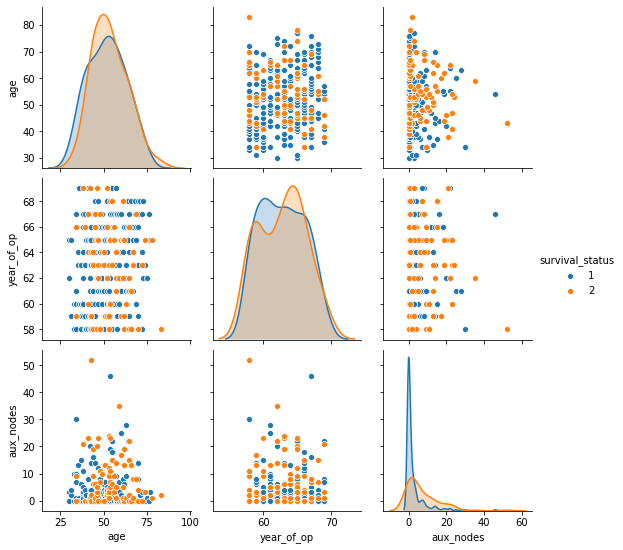

In [101]:
sns.pairplot(data=df,hue='survival_status')

## Box Plots and Violin Plots

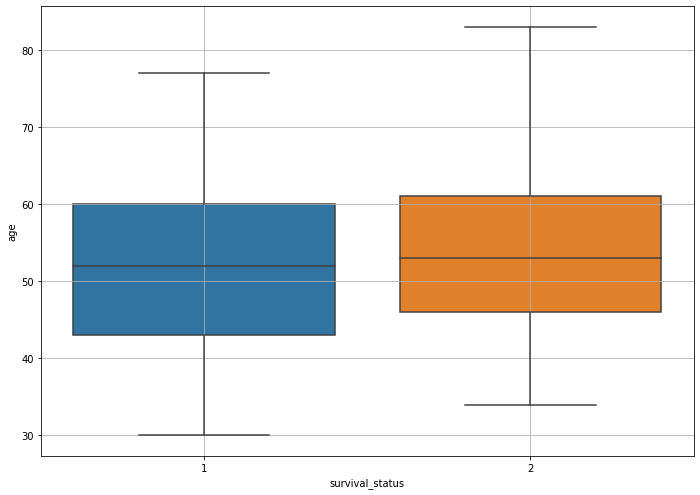

In [103]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)

sns.boxplot(x='survival_status',y='age',data=df)
plt.grid()

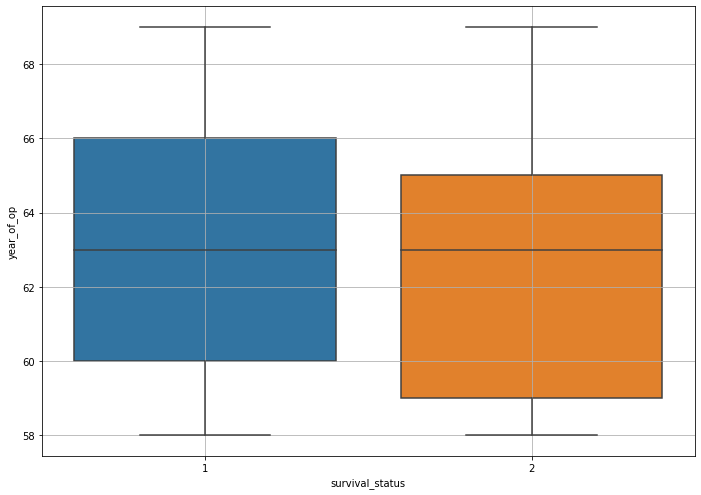

In [104]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)

sns.boxplot(x='survival_status',y='year_of_op',data=df)
plt.grid()

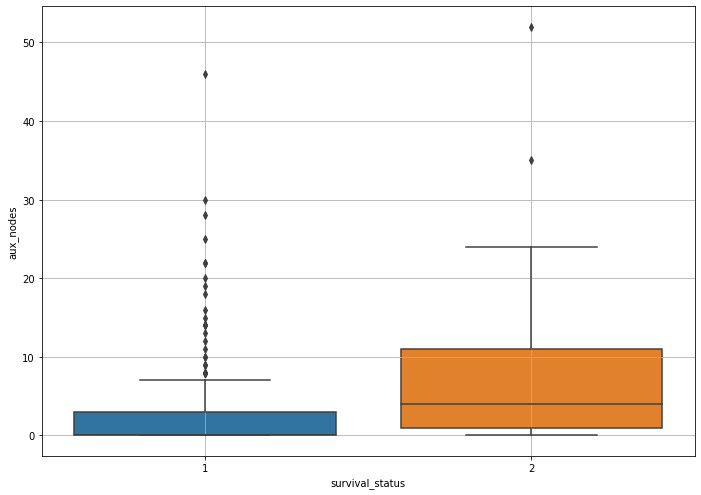

In [105]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)

sns.boxplot(x='survival_status',y='aux_nodes',data=df)
plt.grid()

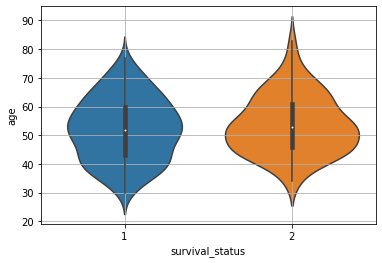

In [106]:
sns.violinplot(x='survival_status',y='age',data=df)
plt.grid()

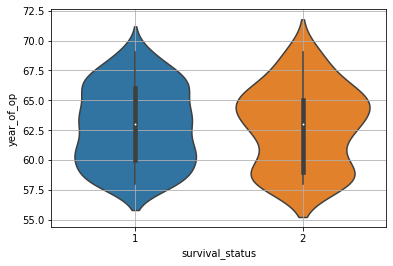

In [107]:
sns.violinplot(x='survival_status',y='year_of_op',data=df)
plt.grid()

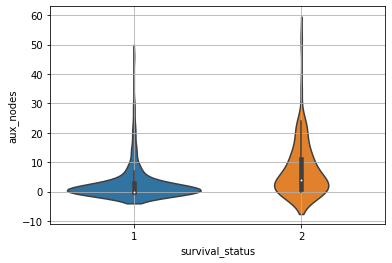

In [108]:
sns.violinplot(x='survival_status',y='aux_nodes',data=df)
plt.grid()